# **MSc Dissertation - Mondaq Ltd.**

In [1]:
# Import Library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

### **Load Datasets**

In [2]:
df1 = pd.read_csv("5k_article_activity.csv")
df1.head()

,article_id,session_tracking_id,individual_session_id,click_event_date
0,726634,747820650,704312710,11/08/2018
1,728406,749792604,706344088,16/08/2018
2,726884,748993528,705447000,14/08/2018
3,726358,748928060,705386434,14/08/2018
4,728320,749445404,705960594,15/08/2018


In [3]:
df2 = pd.read_csv("5k_articles.csv", encoding="unicode_escape")
df2.head()

,article_id,article_publish_date,title,topic_desc,country_desc
0,691194,25/10/2018,Canada&#39;s Mandatory Privacy Breach Reportin...,Privacy,Canada
1,709050,20/07/2018,Medical Marijuana: If You Can't Measure Residu...,Employment and HR,Canada
2,715494,02/07/2018,Ontario Welcomes New Cabinet - Expect Quick Ac...,"Government, Public Sector",Canada
3,715230,02/07/2018,Modern Slavery Act tabled in Parliament,"Government, Public Sector",Australia
4,715262,02/07/2018,Queensland Government Bulletin - 27 June 2018,"Government, Public Sector",Australia


## **Exploratory Data Analysis.**

In [4]:
# Drop all the rows with empty columns in the dataset.
df1 = df1.dropna()
df2 = df2.dropna()

# Remove Duplicate Data.
df1 = df1.drop_duplicates(keep="first")
df2 = df2.drop_duplicates(keep="first")

# Print the dimensionality of the DataFrame.
print("Shape of '5k_article_activity.csv' dataset:", df1.shape)
print("Shape of '5k_articles.csv' dataset:", df2.shape)

Shape of '5k_article_activity.csv' dataset: (192958, 4)
Shape of '5k_articles.csv' dataset: (5000, 5)


## **Feature Engineering.**

**Extract Number of Clicks per Article ID.**

In [5]:
temp = df1.groupby(["article_id"]).count()
clicks = []
for i in range(len(temp)):
    clicks.append([temp.index[i], temp["session_tracking_id"].values[i]])

clicks = pd.DataFrame(np.array(clicks), columns=["article_id", "clicks"])

In [6]:
# Merge "df2" dataset with "clicks" dataset.
article = pd.merge(left=df2, right=clicks)

article_data = []

for i in range(len(article)):
    article_data.append(
        [
            article["article_id"].values[i],
            article["article_publish_date"].values[i],
            datetime.strptime(
                article["article_publish_date"].values[i], "%d/%m/%Y"
            ).strftime("%A"),
            article["title"].values[i],
            article["topic_desc"].values[i],
            article["country_desc"].values[i],
            article["clicks"].values[i],
        ]
    )

article_data = pd.DataFrame(
    np.array(article_data),
    columns=[
        "article_id",
        "article_publish_date",
        "article_publish_day",
        "title",
        "topic_desc",
        "country_desc",
        "clicks",
    ],
)

# Convert type to integer.
article_data["clicks"] = article_data["clicks"].astype("int")

# Drop all the rows with empty columns in the dataset.
article_data = article_data.dropna()

# Remove Duplicate Data.
article_data = article_data.drop_duplicates(keep="first")

# Count Distinct Observations.
print(article_data.nunique())

article_data.head()

article_id              4992
article_publish_date     397
article_publish_day        7
title                   4912
topic_desc                10
country_desc               2
clicks                   228
dtype: int64


,article_id,article_publish_date,article_publish_day,title,topic_desc,country_desc,clicks
0,709050,20/07/2018,Friday,Medical Marijuana: If You Can't Measure Residu...,Employment and HR,Canada,1
1,715494,02/07/2018,Monday,Ontario Welcomes New Cabinet - Expect Quick Ac...,"Government, Public Sector",Canada,1
2,715230,02/07/2018,Monday,Modern Slavery Act tabled in Parliament,"Government, Public Sector",Australia,23
3,715262,02/07/2018,Monday,Queensland Government Bulletin - 27 June 2018,"Government, Public Sector",Australia,47
4,715442,02/07/2018,Monday,That's A Hypothetical! And Other Common Discov...,"Litigation, Mediation & Arbitration",Canada,8


**Number of Articles per Topic Description.**

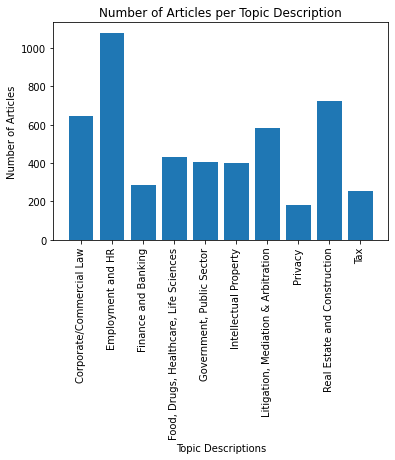

In [7]:
count = [info for info, df in article_data.groupby(["topic_desc"])]
plt.bar(count, article_data.groupby(["topic_desc"]).count()["clicks"])
plt.gca().set(
    xlabel="Topic Descriptions",
    ylabel="Number of Articles",
    title="Number of Articles per Topic Description",
)
plt.xticks(count, rotation="vertical", size=10)
plt.gcf().savefig("Image-1.png", bbox_inches="tight")
plt.show()

**Number of Clicks per Topic Description.**

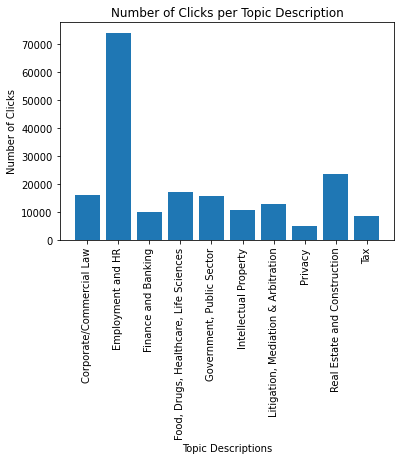

In [8]:
count = [info for info, df in article_data.groupby(["topic_desc"])]
plt.bar(count, article_data.groupby(["topic_desc"]).sum()["clicks"])
plt.gca().set(
    xlabel="Topic Descriptions",
    ylabel="Number of Clicks",
    title="Number of Clicks per Topic Description",
)
plt.xticks(count, rotation="vertical", size=10)
plt.gcf().savefig("Image-2.png", bbox_inches="tight")
plt.show()

**Number of Articles per Topic Description (based on Country).**

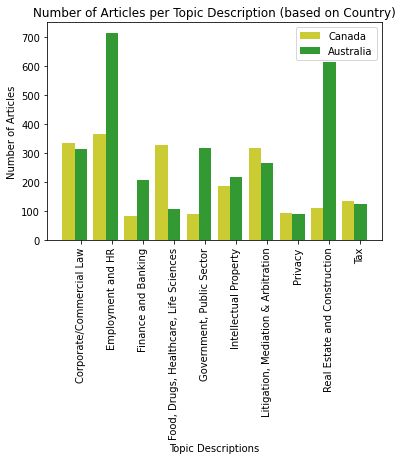

In [9]:
count = [info for info, df in article_data.groupby(["topic_desc"])]

canada = np.array(
    article_data[article_data.country_desc == "Canada"]
    .groupby(["topic_desc"])
    .count()["clicks"]
)
australia = np.array(
    article_data[article_data.country_desc == "Australia"]
    .groupby(["topic_desc"])
    .count()["clicks"]
)

fig, ax = plt.subplots()
rects1 = plt.bar(
    np.arange(len(count)), canada, 0.4, alpha=0.8, color="y", label="Canada"
)
rects2 = plt.bar(
    np.arange(len(count)) + 0.4, australia, 0.4, alpha=0.8, color="g", label="Australia"
)
plt.gca().set(
    xlabel="Topic Descriptions",
    ylabel="Number of Articles",
    title="Number of Articles per Topic Description (based on Country)",
)
plt.xticks(np.arange(len(count)) + 0.4, count, rotation="vertical", size=10)
plt.legend()
plt.savefig("Image-3.png", bbox_inches="tight")

**Number of Clicks per Topic Description (based on Country).**

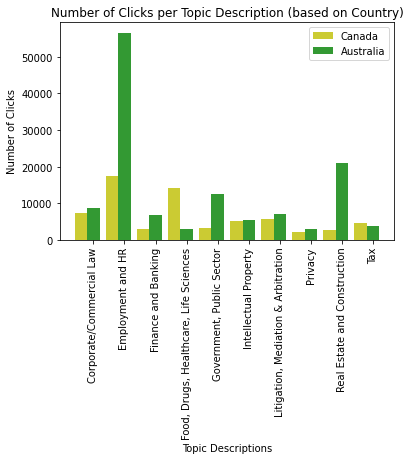

In [10]:
count = [info for info, df in article_data.groupby(["topic_desc"])]
canada = np.array(
    article_data[article_data.country_desc == "Canada"]
    .groupby(["topic_desc"])
    .sum()["clicks"]
)
australia = np.array(
    article_data[article_data.country_desc == "Australia"]
    .groupby(["topic_desc"])
    .sum()["clicks"]
)

fig, ax = plt.subplots()
rects1 = plt.bar(
    np.arange(len(count)), canada, 0.4, alpha=0.8, color="y", label="Canada"
)
rects2 = plt.bar(
    np.arange(len(count)) + 0.4, australia, 0.4, alpha=0.8, color="g", label="Australia"
)
plt.gca().set(
    xlabel="Topic Descriptions",
    ylabel="Number of Clicks",
    title="Number of Clicks per Topic Description (based on Country)",
)
plt.xticks(np.arange(len(count)) + 0.4, count, rotation="vertical", size=10)
plt.legend()
plt.savefig("Image-4.png", bbox_inches="tight")

**Number of Clicks based on Article Publish Date.**

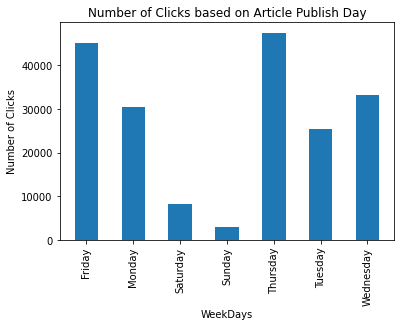

In [11]:
mon = article_data[article_data.article_publish_day == "Monday"].sum()["clicks"]
tue = article_data[article_data.article_publish_day == "Tuesday"].sum()["clicks"]
wed = article_data[article_data.article_publish_day == "Wednesday"].sum()["clicks"]
thu = article_data[article_data.article_publish_day == "Thursday"].sum()["clicks"]
fri = article_data[article_data.article_publish_day == "Friday"].sum()["clicks"]
sat = article_data[article_data.article_publish_day == "Saturday"].sum()["clicks"]
sun = article_data[article_data.article_publish_day == "Sunday"].sum()["clicks"]

list_info = [
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    [mon, tue, wed, thu, fri, sat, sun],
]

day_clicks = pd.DataFrame(list_info).T
day_clicks.columns = ["article_publish_day", "clicks"]
count = [day for day, df in day_clicks.groupby(["article_publish_day"])]

plt.bar(count, day_clicks.groupby(["article_publish_day"]).sum()["clicks"], 0.5)
plt.gca().set(
    xlabel="WeekDays",
    ylabel="Number of Clicks",
    title="Number of Clicks based on Article Publish Day",
)
plt.xticks(count, rotation="vertical", size=10)
plt.gcf().savefig("Image-5.png", bbox_inches="tight")
plt.show()

**Click Analytics of each Article.**

In [12]:
data_one = pd.merge(left=df1, right=clicks)
data_one.drop(["session_tracking_id", "individual_session_id"], axis=1, inplace=True)
activity_data = pd.merge(left=data_one, right=article)

activity_data.drop(columns=["title", "topic_desc", "country_desc"])
track = []

for i in range(len(activity_data)):
    a = datetime.strptime(activity_data["article_publish_date"].values[i], "%d/%m/%Y")
    b = datetime.strptime(activity_data["click_event_date"].values[i], "%d/%m/%Y")
    track.append(
        [
            activity_data["article_id"].values[i],
            activity_data["article_publish_date"].values[i],
            activity_data["click_event_date"].values[i],
            (b - a).days,
            activity_data["clicks"].values[i],
        ]
    )

track = pd.DataFrame(
    np.array(track),
    columns=[
        "article_id",
        "article_publish_date",
        "click_event_date",
        "DaysGap",
        "clicks",
    ],
)

temp = track.article_id.unique()
day_track = []

for id in temp:
    temp_track = track[track.article_id == id]
    week1 = week2 = remaining = 0
    day0 = day1 = day2 = day3 = day4 = day5 = day6 = 0
    for j in range(len(temp_track)):
        if int(temp_track["DaysGap"].values[j]) == 0:
            day0 = day0 + 1
        if int(temp_track["DaysGap"].values[j]) == 1:
            day1 = day1 + 1
        if int(temp_track["DaysGap"].values[j]) == 2:
            day2 = day2 + 1
        if int(temp_track["DaysGap"].values[j]) == 3:
            day3 = day3 + 1
        if int(temp_track["DaysGap"].values[j]) == 4:
            day4 = day4 + 1
        if int(temp_track["DaysGap"].values[j]) == 5:
            day5 = day5 + 1
        if int(temp_track["DaysGap"].values[j]) == 6:
            day6 = day6 + 1
        if int(temp_track["DaysGap"].values[j]) < 7:
            week1 = week1 + 1
        elif (
            int(temp_track["DaysGap"].values[j]) >= 7
            and int(temp_track["DaysGap"].values[j]) < 14
        ):
            week2 = week2 + 1
        elif int(temp_track["DaysGap"].values[j]) >= 14:
            remaining = remaining + 1
    day_track.append(
        [id, day0, day1, day2, day3, day4, day5, day6, week1, week2, remaining]
    )

day_track = pd.DataFrame(
    np.array(day_track),
    columns=[
        "article_id",
        "Day-0",
        "Day-1",
        "Day-2",
        "Day-3",
        "Day-4",
        "Day-5",
        "Day-6",
        "Week-1 Clicks",
        "Week-2 Clicks",
        "Remaining Clicks",
    ],
)

day_track

,article_id,Day-0,Day-1,Day-2,Day-3,Day-4,Day-5,Day-6,Week-1 Clicks,Week-2 Clicks,Remaining Clicks
0,726634,1,7,2,0,1,0,0,11,0,0
1,728406,29,38,33,27,13,3,2,145,2,1
2,726884,52,21,5,3,2,0,3,86,7,0
3,726358,4,2,3,0,0,0,1,10,2,0
4,728320,16,17,5,1,0,5,1,45,5,2
...,...,...,...,...,...,...,...,...,...,...,...
4987,845522,3,6,2,1,1,0,0,13,0,0
4988,845520,5,3,0,0,0,0,0,8,3,0
4989,845524,6,3,4,0,1,0,0,14,1,0
4990,845212,8,2,12,3,1,1,0,27,3,0


## **Text Preprocessing.**

In [13]:
import nltk, re
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

**Text Processing and Feature Extraction.**

In [14]:
""" Text Processing: Cleaning the Texts. """

def text_processing(statement):
    # Remove Punctuations and Digits.
    text = re.sub("[^a-zA-Z]", " ", statement)
    # Remove words length less than 3 from the string.
    text = re.sub(r"\b\w{1,2}\b", "", text)
    # Convert string to lowercase.
    text = text.lower()
    # Split string into a list.
    text = text.split()
    # Lemmatization and Remove Stopwords.
    text = [
        WordNetLemmatizer().lemmatize(word)
        for word in text
        if not word in set(stopwords.words("english"))
    ]
    text = " ".join(text)
    return text


""" Text Feature Extraction. """

def feature_extraction(statement):
    corpus = []
    # Extract Polarity Score.
    polarity = TextBlob(statement).sentiment.polarity
    # Extract Subjectivity Score.
    subjectivity = TextBlob(statement).sentiment.subjectivity
    # Count of words in a statement.
    word_count = len(str(statement).split(" "))
    # Count of characters in a statement.
    character_count = len(str(statement))
    # Count punctuations in a statement.
    punctuation_count = len(
        [sentence for sentence in re.split(r"[.?!;:,'*-]", statement) if sentence]
    )
    # Append Extracted Features in a List.
    corpus.append(
        [polarity, subjectivity, word_count, character_count, punctuation_count]
    )
    return corpus


""" Extract Text Features Scores. """
data = article_data[["title", "topic_desc", "country_desc", "clicks"]]

# Extract the Polarity Score.
data["polarity"] = data["title"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Extract the Subjectivity Score.
data["subjectivity"] = data["title"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Count Words in the Statement.
data["word_count"] = data["title"].apply(lambda x: len(str(x).split(" ")))

# Count Characters in the Statement.
data["character_count"] = data["title"].apply(lambda x: len(str(x)))

# Count Punctuations in the Statement.
data["punctuation_count"] = data["title"].apply(
    lambda x: len([sentence for sentence in re.split(r"[.?!;:,'*-]", x) if sentence])
)

# Text Processing: Cleaning the Texts.
data["title"] = data["title"].apply(lambda x: text_processing(x))

data = data[
    [
        "title",
        "polarity",
        "subjectivity",
        "word_count",
        "character_count",
        "punctuation_count",
        "topic_desc",
        "country_desc",
        "clicks",
    ]
]

**Extract Keywords for Indexing.**

In [15]:
from sklearn.feature_extraction.text import (
    TfidfVectorizer,
    CountVectorizer,
    TfidfTransformer,
)

def sort_coo(coo_matrix):
    return sorted(
        zip(coo_matrix.col, coo_matrix.data), key=lambda x: (x[1], x[0]), reverse=True
    )

def top_n(feature_names, sorted_items, topn):
    score = []
    feature = []
    for idx, src in sorted_items[:topn]:
        score.append(round(src, 3))
        feature.append(feature_names[idx])
    lists = {}
    for idx in range(len(feature)):
        lists[feature[idx]] = score[idx]
    return lists

stop_words = set(stopwords.words("english"))

def keywords(text):
    corpus = []
    for i in range(len(data)):
        corpus.append(data["title"][i])
    vectorizer = CountVectorizer(stop_words=stop_words)
    tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True).fit(
        vectorizer.fit_transform(corpus)
    )
    return top_n(
        vectorizer.get_feature_names(),
        sort_coo(tfidf_transformer.transform(vectorizer.transform([text])).tocoo()),
        2000,
    )

**Plot Function for Confusion Matrix.**

In [16]:
import itertools


def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues
):
    """
    This function prints and plots the Confusion Matrix.
    Normalization can be applied by setting `normalize = True`.
    """
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)" % (cm[i, j])
    plt.tight_layout()
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

## **Handling Outliers in Data and Class Distribution.**

In [17]:
# Handling Outliers with Z-Score.
def ztransform_outliers(array, threshold):
    outliers = []
    z_score = stats.zscore(array)
    for i in range(len(z_score)):
        if z_score[i] > threshold or z_score[i] < -threshold:
            outliers.append(int((z_score[i] * np.std(array)) + np.mean(array)))
    new_array = [i for i in array if i not in outliers]
    return np.sort(outliers), np.sort(new_array)


# Handling Outliers with InterQuartile Range (IQR).
def iqr_outliers(array):
    quartile1, quartile3 = np.percentile(array, [25, 75])
    iqr_value = quartile3 - quartile1  # stats.iqr(data, rng = (25, 75)).
    lower_bound_val = quartile1 - (1.5 * iqr_value)
    upper_bound_val = quartile3 + (1.5 * iqr_value)
    outliers = []
    for i in range(len(array)):
        if array[i] > upper_bound_val or array[i] < lower_bound_val:
            outliers.append(array[i])
    new_array = [i for i in array if i not in outliers]
    return np.sort(outliers), np.sort(new_array)

**Visualize Outliers using SwarmPlot.**

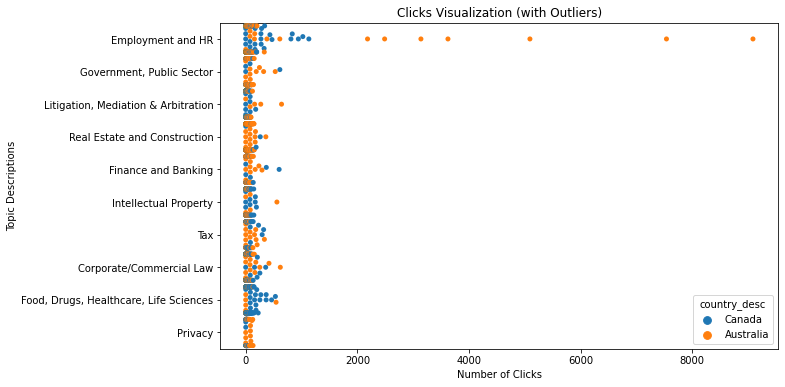

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.swarmplot(x="clicks", y="topic_desc", hue="country_desc", data=data)
ax.set(
    xlabel="Number of Clicks",
    ylabel="Topic Descriptions",
    title="Clicks Visualization (with Outliers)",
)
plt.gcf().savefig("Image-7.png", bbox_inches="tight")
plt.show()

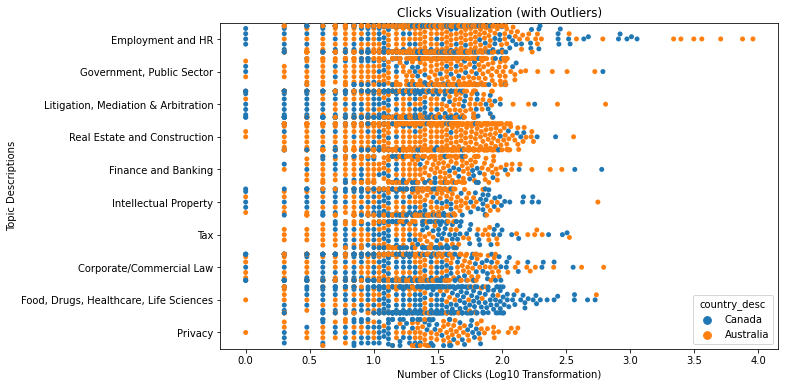

In [19]:
data["log_clicks"] = np.log10(data["clicks"])
plt.figure(figsize=(10, 6))
ax = sns.swarmplot(x="log_clicks", y="topic_desc", hue="country_desc", data=data)
ax.set(
    xlabel="Number of Clicks (Log10 Transformation)",
    ylabel="Topic Descriptions",
    title="Clicks Visualization (with Outliers)",
)
plt.gcf().savefig("Image-8.png", bbox_inches="tight")
plt.show()
del data["log_clicks"]

**Removing Outliers in Data.**

In [20]:
data = data[data.clicks < ztransform_outliers(np.array(data["clicks"]), 1)[0][0]]
data = data.reset_index(drop=True)

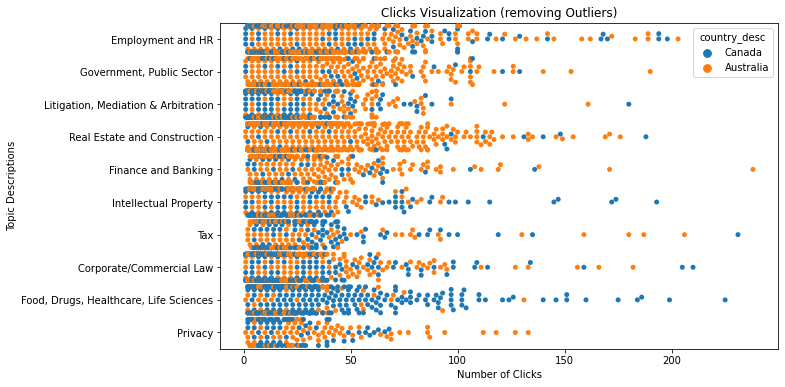

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.swarmplot(x="clicks", y="topic_desc", hue="country_desc", data=data)
ax.set(
    xlabel="Number of Clicks",
    ylabel="Topic Descriptions",
    title="Clicks Visualization (removing Outliers)",
)
plt.gcf().savefig("Image-9.png", bbox_inches="tight")
plt.show()

**Class Distribution in Data.**

In [22]:
topic = [info for info, df in data.groupby(["topic_desc"])]
country = [info for info, df in data.groupby(["country_desc"])]

for i in range(len(country)):
    for j in range(len(topic)):
        p1 = p2 = 0
        temp = np.array(
            data[
                (data["topic_desc"] == topic[j]) & (data["country_desc"] == country[i])
            ]["clicks"]
        )
        temp = temp.astype("float")
        matrix = ztransform_outliers(temp, 10)[1]
        p1, p2 = np.percentile(matrix, [33.333333, 66.666667])
        for k in range(len(data)):
            if (
                data["topic_desc"][k] == topic[j]
                and data["country_desc"][k] == country[i]
            ):
                if data["clicks"][k] <= p1:
                    data["clicks"][k] = 0
                elif data["clicks"][k] > p1 and data["clicks"][k] <= p2:
                    data["clicks"][k] = 1
                elif data["clicks"][k] > p2:
                    data["clicks"][k] = 2

**Encode Categorical Data.**

In [23]:
# Label Encoding the "topic_desc" and "country_desc" columns.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["topic_desc"] = le.fit_transform(data["topic_desc"])
data["country_desc"] = le.fit_transform(data["country_desc"])

"""
# One Hot Encoding the "topic_desc" and "country_desc" columns.
X = data.iloc[:, :].values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [("encoder", OneHotEncoder(), [6,7])], remainder="passthrough")
X = np.array(ct.fit_transform(X))
data = pd.DataFrame(X)
"""

topic_labels = {
    "Corporate/Commercial Law": 0,
    "Employment and HR": 1,
    "Finance and Banking": 2,
    "Food, Drugs, Healthcare, Life Sciences": 3,
    "Government, Public Sector": 4,
    "Intellectual Property": 5,
    "Litigation, Mediation & Arbitration": 6,
    "Privacy": 7,
    "Real Estate and Construction": 8,
    "Tax": 9,
}


country_labels = {"Australia": 0, "Canada": 1}

## **Tokenization with TensorFlow & Keras (Converting Text to Features).**

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

words = 0
for i in range(len(data)):
    # Total words in the corpora.
    words = words + len(str(data["title"][i]).split(" "))

sentences = np.array(data["title"])
tokenizer = Tokenizer(num_words=words, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

sequences = pad_sequences(
    tokenizer.texts_to_sequences(sentences),
    padding="post",
    truncating="post",
    maxlen=26,
)
sequences = pd.DataFrame(sequences)

# Merge Feature Dataset.
temp_data = pd.DataFrame(
    data.iloc[:, 1:],
    columns=[
        "polarity",
        "subjectivity",
        "word_count",
        "character_count",
        "punctuation_count",
        "topic_desc",
        "country_desc",
        "clicks",
    ],
)

dataset = pd.concat([sequences, temp_data], axis=1, sort=False)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,polarity,subjectivity,word_count,character_count,punctuation_count,topic_desc,country_desc,clicks
0,168,248,475,3016,3017,1124,84,60,2117,476,...,0,0,0.033333,0.300000,36,247,11,1,1,0
1,11,1125,3,1663,560,777,32,0,0,0,...,0,0,0.189899,0.351515,8,50,2,4,1,0
2,107,151,12,2120,477,0,0,0,0,0,...,0,0,0.200000,0.300000,6,39,1,4,0,1
3,46,6,40,379,0,0,0,0,0,0,...,0,0,0.000000,0.000000,7,45,2,4,0,2
4,3023,177,712,967,1361,2121,0,0,0,0,...,0,0,-0.075000,0.358333,12,87,4,6,1,0


In [25]:
# Count for each Class Variable.
print("Count for each Class Variable:")
print(dataset["clicks"].value_counts())

Count for each Class Variable:
0    1717
1    1615
2    1610
Name: clicks, dtype: int64


## **Predictive Modeling.**

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    cohen_kappa_score,
    make_scorer,
    confusion_matrix,
    classification_report,
)

# Split dataset in Features and Target Set.
train_data_x = dataset.iloc[:, :-1].values
train_data_y = dataset.iloc[:, -1].values

train_data_y = train_data_y.astype("int")

# Feature Scaling.
sc = StandardScaler()
train_data_x = sc.fit_transform(train_data_x)

# Split dataset into Training and Test Set.
X_train, X_test, y_train, y_test = train_test_split(
    train_data_x, train_data_y, test_size=0.1, random_state=42
)

### **Model #1: Support Vector Machine Classifier.**

SVM Accuracy Score: 0.3898989898989899
SVM Kappa Score: 0.08378278989948518
              precision    recall  f1-score   support

           0       0.37      0.56      0.45       167
           1       0.38      0.19      0.26       165
           2       0.42      0.41      0.42       163

    accuracy                           0.39       495
   macro avg       0.39      0.39      0.37       495
weighted avg       0.39      0.39      0.37       495

Normalized Confusion Matrix


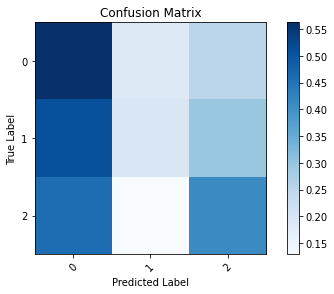

In [27]:
from sklearn.svm import SVC

parameter = {"kernel": ["linear", "rbf", "poly", "sigmoid"]}

SVM_grid = GridSearchCV(
    SVC(random_state=42), parameter, scoring=make_scorer(cohen_kappa_score), cv=10
).fit(X_train, y_train)

SVM_pred = SVM_grid.predict(X_test)

# Performance Score.
print("SVM Accuracy Score:", accuracy_score(y_test, SVM_pred))
print("SVM Kappa Score:", cohen_kappa_score(y_test, SVM_pred))
print(classification_report(y_test, SVM_pred, labels=[0, 1, 2]))

# Confusion Matrix.
cnf_matrix = confusion_matrix(y_test, SVM_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(
    cnf_matrix,
    classes=range(len(set(train_data_y))),
    normalize=True,
    title="Confusion Matrix",
)
plt.gcf().savefig("Image-10.png", bbox_inches="tight")

### **Model #2: Random Forest Classifier.**

Random Forest Accuracy Score: 0.4
Random Forest Kappa Score: 0.09912863375655678
              precision    recall  f1-score   support

           0       0.41      0.50      0.45       167
           1       0.36      0.35      0.35       165
           2       0.45      0.35      0.39       163

    accuracy                           0.40       495
   macro avg       0.40      0.40      0.40       495
weighted avg       0.40      0.40      0.40       495

Normalized Confusion Matrix


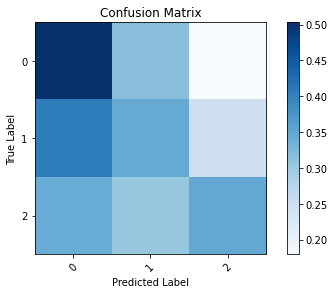

In [28]:
from sklearn.ensemble import RandomForestClassifier

parameter = {
    "criterion": ["gini", "entropy"],
    "max_depth": [20, 25, 30, 35, 40],
    "min_samples_split": [2, 3, 4],
}

RF_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    parameter,
    scoring=make_scorer(cohen_kappa_score),
    cv=10,
).fit(X_train, y_train)

RF_pred = RF_grid.predict(X_test)

# Performance Score.
print("Random Forest Accuracy Score:", accuracy_score(y_test, RF_pred))
print("Random Forest Kappa Score:", cohen_kappa_score(y_test, RF_pred))
print(classification_report(y_test, RF_pred, labels=[0, 1, 2]))

# Confusion Matrix.
cnf_matrix = confusion_matrix(y_test, RF_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(
    cnf_matrix,
    classes=range(len(set(train_data_y))),
    normalize=True,
    title="Confusion Matrix",
)
plt.gcf().savefig("Image-11.png", bbox_inches="tight")

### **Model #3: AdaBoost Classifier.**

AdaBoost Accuracy Score: 0.37373737373737376
AdaBoost Kappa Score: 0.05997304582210261
              precision    recall  f1-score   support

           0       0.38      0.50      0.43       167
           1       0.30      0.19      0.23       165
           2       0.42      0.42      0.42       163

    accuracy                           0.37       495
   macro avg       0.36      0.37      0.36       495
weighted avg       0.36      0.37      0.36       495

Normalized Confusion Matrix


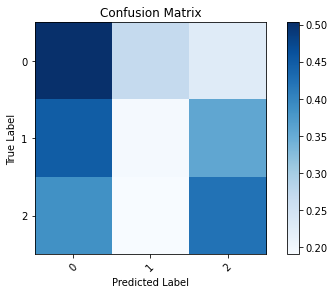

In [29]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    base_estimator=RandomForestClassifier(
        criterion="gini", max_depth=1, min_samples_split=3
    ),
    n_estimators=80,
    random_state=42,
).fit(X_train, y_train)

ada_pred = ada_clf.predict(X_test)

# Performance Score.
print("AdaBoost Accuracy Score:", accuracy_score(y_test, ada_pred))
print("AdaBoost Kappa Score:", cohen_kappa_score(y_test, ada_pred))
print(classification_report(y_test, ada_pred, labels=[0, 1, 2]))

# Confusion Matrix.
cnf_matrix = confusion_matrix(y_test, ada_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(
    cnf_matrix,
    classes=range(len(set(train_data_y))),
    normalize=True,
    title="Confusion Matrix",
)
plt.gcf().savefig("Image-12.png", bbox_inches="tight")

## **Testing and Validation**

In [30]:
# Feature Extraction function from the text.
def extract_features(statement, topic, country):
    extract = feature_extraction(statement)
    sequences = pad_sequences(
        tokenizer.texts_to_sequences([text_processing(statement)]),
        padding="post",
        truncating="post",
        maxlen=26,
    )
    topic_labels = {
        "Corporate/Commercial Law": 0,
        "Employment and HR": 1,
        "Finance and Banking": 2,
        "Food, Drugs, Healthcare, Life Sciences": 3,
        "Government, Public Sector": 4,
        "Intellectual Property": 5,
        "Litigation, Mediation & Arbitration": 6,
        "Privacy": 7,
        "Real Estate and Construction": 8,
        "Tax": 9,
    }
    country_labels = {"Australia": 0, "Canada": 1}

    corpus = []
    for i in range(len(sequences[0])):
        corpus.append(sequences[0][i])
    for i in range(len(extract[0])):
        corpus.append(extract[0][i])

    corpus.append(topic_labels[topic])
    corpus.append(country_labels[country])
    return corpus


text = (
    "Employee Of Independent Contractor? Recent Trends In The Classification Of Workers"
)
topic_desc = "Employment and HR"
country_desc = "Canada"

if topic_desc in topic_labels and country_desc in country_labels:
    prediction = ada_clf.predict(
        sc.transform([extract_features(text, topic=topic_desc, country=country_desc)])
    )
    if prediction == [0]:
        print("Low Clicks")
    elif prediction == [1]:
        print("Medium Clicks")
    elif prediction == [2]:
        print("High Clicks")
    print("List of Keywords in the Text:", keywords(text))
else:
    print("Invalid Input")

Low Clicks
List of Keywords in the Text: {'classification': 0.565, 'independent': 0.52, 'contractor': 0.436, 'recent': 0.351, 'employee': 0.312}
